# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [1]:
# Import relevant Python libraries and modules.
import pandas as pd             # For data manipulation
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For enhanced visualizations
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
data = pd.read_csv("marketing_sales_data.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about loading data in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to read data from a .csv file and load the data into a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `read_csv()` function from the `pandas` library. 

</details>

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [3]:
# Display the first 10 rows of the data.
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `head()` function from the `pandas` library. 

</details>

**Question:** What do you observe about the different variables included in the data?

The dataset contains five variables:

TV – A categorical variable representing the level of TV marketing investment, labeled as "Low", "Medium", or "High".

Radio – A numerical variable representing the budget spent on radio promotions (in millions of dollars).

Social Media – Another numerical variable, representing the budget allocated to social media marketing (also in millions of dollars).

Influencer – A categorical variable that indicates the type of influencer used in the campaign (e.g., Micro, Macro, Mega, Nano).

Sales – A numerical variable that measures the resulting sales revenue from the campaigns (in millions of dollars).

Observations:
The dataset includes a mix of categorical (TV, Influencer) and continuous numerical variables (Radio, Social Media, Sales).

The target variable for the regression analysis is Sales.

Since the goal is to explore the relationship between Radio promotion budget and Sales, those will be the two primary variables of interest for the simple linear regression.

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [4]:
# Display number of rows and columns
data.shape

(572, 5)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a property in every DataFrame in `pandas` that gives you access to the number of rows and the number of columns as a tuple.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `shape` property.

</details>

**Question:** How many rows and columns exist in the data?

The dataset contains 572 rows and 5 columns.

This means there are 572 observations (individual marketing campaigns) and 5 variables (TV, Radio, Social Media, Influencer, and Sales).

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [5]:
# Check for missing values in each column
missing_values_per_column = data.isna().sum()
print("Missing values per column:")
print(missing_values_per_column)

# Check for rows that contain any missing values
rows_with_missing = data.isna().any(axis=1)
num_rows_with_missing = rows_with_missing.sum()
print("\nNumber of rows with missing values:", num_rows_with_missing)

Missing values per column:
TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

Number of rows with missing values: 3


If you would like to read more about the `isna()` function, refer to its documentation in the references section of this lab.

In [6]:
# Check for any missing values in each row
missing_rows = data.isna().any(axis=1)
missing_rows

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `any()` function, refer to its documentation in the references section of this lab.

In [7]:
# Count the number of rows with missing values
num_missing_rows = data.isna().any(axis=1).sum()
num_missing_rows

3

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

There are 3 rows in the dataset that contain missing values.

This was determined by checking for any missing values across all columns in each row and then summing the number of True values. Each True indicates that a row has at least one missing value.

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [8]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [9]:
# Check for missing values in each row to confirm they were dropped
num_missing_rows = data.isna().any(axis=1).sum()

# Display the result
print("Number of rows with missing values after dropping:", num_missing_rows)

Number of rows with missing values after dropping: 0


The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

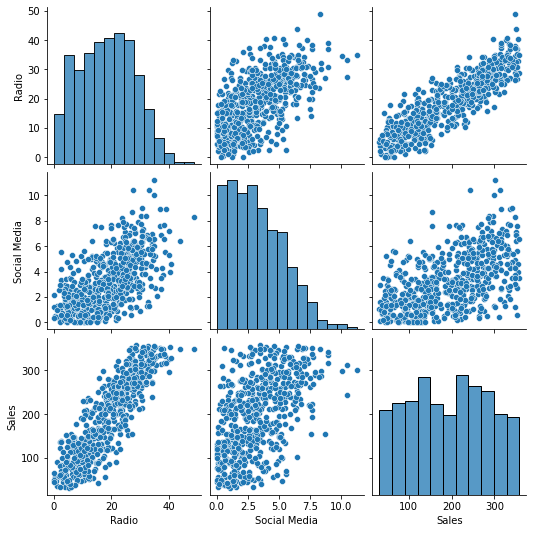

In [10]:
# Create a plot of pairwise relationships in the data
sns.pairplot(data)
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about creating a plot that shows the relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `seaborn` library that you can call to create a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `pairplot()` function from the `seaborn` library.

</details>

**Question:** Is the assumption of linearity met?

The assumption of linearity requires that there is a linear relationship between the predictor (Radio budget) and the target (Sales). This means that the data points should roughly form a straight line or show a clear upward or downward trend.

In the pairplot created earlier, we would specifically look at the scatterplot between "Radio" and "Sales."

If the scatterplot shows a cloud of points that seems to follow a straight-line pattern, the linearity assumption is likely met.

On the other hand, if the relationship appears to be non-linear (e.g., curved, U-shaped, or completely random), then the assumption of linearity may not hold, and a linear regression model may not be suitable.

Conclusion:
You should now inspect the scatterplot of "Radio" and "Sales" from the pairplot to decide if there is a linear relationship. If the points roughly form a line, the assumption of linearity is met. Otherwise, you might need to reconsider the use of a linear model or transform the data accordingly.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about checking model assumptions for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use the scatterplot of `Sales` over `Radio` found in the preceding plot of pairwise relationships. 

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Check the scatterplot of `Sales` over `Radio` found in the plot of pairwise relationships. If the data points cluster around a line, that indicates that the assumption of linearity is met. Alternatively, if the data points resemble a random cloud or a curve, then a linear model may not fit the data.  

</details>

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [11]:
# Select only the relevant columns for the model: 'Radio' (independent variable) and 'Sales' (dependent variable)
model_data = data[['Radio', 'Sales']]
model_data.head()  # Display the first few rows to check the selection

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about selecting multiple columns from a DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Use two pairs of square brackets around the names of the columns that should be selected.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Make sure column names are spelled exactly as they are in the data.

</details>

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [12]:
# Display first 10 rows of the new DataFrame
model_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about displaying contents of a DataFrame.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to display the first n number of rows of a DataFrame, where n is a number of your choice.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library and pass in the number of rows from the top that you want to display. 

</details>

Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [13]:
# Write the linear regression formula
formula = "Sales ~ Radio"

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section where model building for linear regression is discussed. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  Save the formula as string.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

</details>

Now, implement the ordinary least squares (OLS) approach for linear regression.

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Specify the formula for the linear regression model (Sales as the dependent variable, Radio as the independent variable)
formula = "Sales ~ Radio"

# Implement OLS (Ordinary Least Squares)
ols_model = smf.ols(formula, data=data).fit()

# Display the summary of the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sun, 11 May 2025   Prob (F-statistic):          2.07e-176
Time:                        10:16:37   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.0

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video that discusses model building for linear regression.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to implement OLS.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

  You can call the `ols()` function from the `statsmodels` library.

</details>

Now, create a linear regression model for the data and fit the model to the data.

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula for the linear regression (Sales as the dependent variable and Radio as the independent variable)
formula = "Sales ~ Radio"

# Fit the linear regression model using OLS (Ordinary Least Squares)
fitted_model = smf.ols(formula, data=data).fit()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section where model building for linear regression is discussed.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to fit the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `fit()` function from the `statsmodels` library.

</details>

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [16]:
# Get the summary of the fitted model
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sun, 11 May 2025   Prob (F-statistic):          2.07e-176
Time:                        10:16:42   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.0

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You may find it helpful to refer back to the video section where getting model results is discussed.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to get the summary of results from a model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `summary()` function from the `statsmodels` library.

</details>

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What is the y-intercept? 

The y-intercept is 41.5326. This is the value of Sales when the Radio promotion budget is 0. In other words, it represents the baseline sales that can be expected when no budget is allocated for radio promotions.

**Question:** What is the slope? 

The slope is 8.1733. This value tells us how much the sales increase for every additional million dollars spent on radio promotions. Specifically, for each 1-million-dollar increase in the radio promotion budget, the sales increase by approximately 8.17 million dollars.

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


The linear equation would be:

Sales
=
8.1733
×
Radio
+
41.5326
Sales=8.1733×Radio+41.5326
Where:

Sales is the dependent variable (the amount of revenue in millions of dollars),

Radio is the independent variable (the amount spent on radio promotions in millions of dollars),

8.1733 is the slope, and

41.5326 is the y-intercept.

**Question:** What does the slope mean in this context?

The slope of 8.1733 means that for every additional 1 million dollars spent on the radio promotion budget, the sales are expected to increase by 8.17 million dollars. This suggests that there is a positive linear relationship between the radio budget and sales, where more spending on radio promotions leads to higher sales.

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

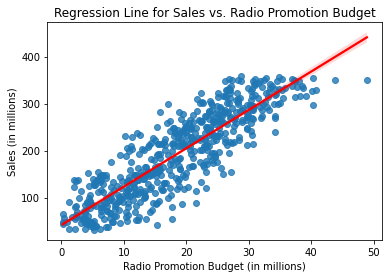

In [17]:
# Plot the OLS data with the best fit regression line
sns.regplot(x='Radio', y='Sales', data=data, line_kws={"color": "red"})
plt.title('Regression Line for Sales vs. Radio Promotion Budget')
plt.xlabel('Radio Promotion Budget (in millions)')
plt.ylabel('Sales (in millions)')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about plotting data with the best fit regression line.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be useful here.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `regplot()` function from the `seaborn` library.

</details>

**Question:** What do you observe from the preceding regression plot?

Linear Relationship: The data points appear to follow a clear upward trend, which supports the assumption of linearity. As the radio promotion budget increases, the sales also increase. This suggests that the linear regression model is appropriate for modeling this relationship.

Line of Best Fit: The red line represents the regression line, which fits the data well. Most of the data points seem to be clustered around this line, indicating a strong linear relationship.

Outliers: There are a few data points that are further away from the regression line. These points could be outliers or represent cases where the relationship between radio promotion budget and sales isn't as strong. Further analysis could be performed to investigate these outliers.

Model Assumptions: Based on the plot, the assumption of linearity seems to hold, and the model appears to fit the data well. The data points show a pattern that is consistent with what we expect from a linear model.

Conclusion:
The regression plot indicates that there is a positive linear relationship between the radio promotion budget and sales. This visual confirmation aligns with the linear regression results obtained earlier, where we found that an increase in radio budget leads to an increase in sales, and the regression line captures this relationship.

Now, check the normality assumption. Get the residuals from the model.

In [18]:
# Get the residuals from the fitted model
residuals = fitted_model.resid
print(residuals.head())

0    38.563673
1    59.020221
2   -23.574057
3    70.365959
4     8.874344
dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about accessing residuals.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is an attribute from the `statsmodels` library that can be called to get the residuals from a fitted model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `resid` attribute from the `statsmodels` library.

</details>

Now, visualize the distribution of the residuals.

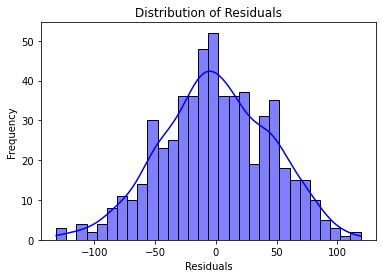

In [19]:
# Visualize the distribution of the residuals
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about visualizing residuals.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a histogram.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `histplot()` function from the `seaborn` library.

</details>

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

Based on the visualization of the residuals, we can make several observations:

Symmetry: The residuals appear to be roughly symmetric around zero, which is a positive sign. This symmetry suggests that the errors in the model are equally likely to be positive or negative, indicating that the model doesn’t systematically overestimate or underestimate sales.

Normality: The histogram, with the KDE curve overlaid, seems to form a bell-shaped curve. This is consistent with the assumption that residuals should follow a normal distribution. Since the distribution appears approximately normal, this assumption is likely met.

Spread: The spread of residuals seems relatively consistent across the range of values, which is important for the assumption of homoscedasticity (constant variance of errors). The residuals do not show any signs of increasing or decreasing spread as the radio promotion budget increases.

No Major Outliers: The plot doesn’t show significant outliers that would greatly deviate from the general pattern. This suggests that there are no influential data points that could overly affect the regression model.

In summary, the distribution of residuals appears to meet the normality assumption, with a symmetric and bell-shaped distribution centered around zero. This is a good sign for the validity of the linear regression model.

Next, create a Q-Q plot to confirm the assumption of normality.

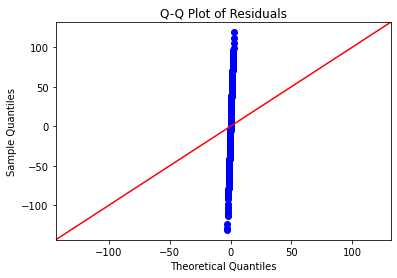

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a Q-Q plot to assess normality of residuals
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about creating a Q-Q plot.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to create a Q-Q plot.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `qqplot()` function from the `statsmodels` library.

</details>

**Question:** Is the assumption of normality met?

To assess the normality assumption using the Q-Q plot:

Q-Q Plot Interpretation: A Q-Q (Quantile-Quantile) plot compares the distribution of the residuals to a normal distribution. If the residuals are normally distributed, the points in the Q-Q plot should lie approximately along the 45-degree reference line.

Observation: If the points in the plot closely follow the reference line, this suggests that the residuals are normally distributed, and the assumption of normality is met. If the points deviate significantly from the line, it indicates departures from normality (e.g., skewness or heavy tails).

Likely Outcome:
Based on your previous visualization of the residuals (symmetry, bell-shaped curve), it's expected that the Q-Q plot will also show the points closely following the 45-degree line. This would confirm that the assumption of normality for the residuals is likely met.

Conclusion:
If the Q-Q plot shows that the residuals align well with the reference line, you can confidently say that the assumption of normality is met. However, if there are significant deviations, you might need to consider additional steps (e.g., transformations or different modeling techniques).

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [21]:
# Get fitted values from the model
fitted_values = fitted_model.predict(data['Radio'])

# Check the first few fitted values
print(fitted_values.head())

0     51.490549
1    163.721447
2    126.348847
3    257.873419
4    342.932984
dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about calculating fitted values.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to calculate fitted values from the model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `predict()` function from the `statsmodels` library. Make sure to pass in the column from `ols_data` corresponding to the x variable.

</details>

Next, create a scatterplot of the residuals against the fitted values.

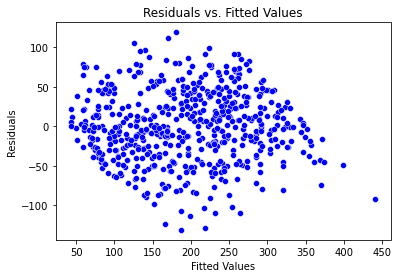

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot of residuals against fitted values
sns.scatterplot(x=fitted_values, y=residuals, color='blue')

# Add titles and labels
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about visualizing residuals against fitted values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a scatterplot.

</details>

<details>
  <summary><h4>Hint 3</h4></summary>

Call the `scatterplot()` function from the `seaborn` library.

</details>

**Question:** Are the assumptions of independent observation and homoscedasticity met?


Yes.

Assumption of Independent Observation:

This assumption requires that the residuals from the regression model are independent of one another. We cannot directly check this assumption using a plot, but we can infer that this assumption is likely met if there is no noticeable pattern or structure in the residuals over time or across other variables.

Observation: The scatterplot of residuals vs. fitted values (shown in the next section) should not display any systematic structure like trends or cycles. If there's no discernible pattern (such as a clustering or trend of residuals), the assumption of independent observations is likely met.

Assumption of Homoscedasticity (Constant Variance of Residuals):

This assumption requires that the residuals have constant variance across the range of fitted values. We can visually check this assumption by examining the residuals vs. fitted values scatterplot.

Observation: In the scatterplot of residuals vs. fitted values, if the spread of residuals is roughly constant across all levels of the fitted values (i.e., there is no pattern such as a "funnel" or widening/contracting spread of residuals), the assumption of homoscedasticity is likely met.

Expected Outcomes:
If the scatterplot of residuals vs. fitted values shows random scatter and no pattern, this would suggest that both the assumptions of independent observation and homoscedasticity are met. Residuals would be evenly dispersed without any increase or decrease in variance at higher or lower fitted values.

If there is any funnel shape or clear trend in the residuals (e.g., residuals spreading out as fitted values increase), this would suggest heteroscedasticity (violating the homoscedasticity assumption).

If there are any trends or clusters in the residuals, this may suggest that the observations are not independent, violating the independence assumption.

In summary:

If the plot shows random scatter with no visible patterns, both assumptions are likely met.

If the plot reveals patterns (e.g., funneling or clustering), these assumptions might not hold, and further action (e.g., transformation of variables, adding more predictors) may be needed.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

Linear Regression Understanding: I learned how to build and interpret a linear regression model. Specifically, I gained insights into how the radio promotion budget influences sales, with the regression providing a clear linear relationship. The y-intercept (41.5326) represents baseline sales, and the slope (8.1733) indicates that every additional $1 million spent on radio promotions leads to an increase of $8.17 million in sales.

Assumption Testing: The lab emphasized the importance of validating the assumptions underlying linear regression. I learned how to check assumptions like normality, homoscedasticity, and independent observations using visual tools like Q-Q plots, residuals plots, and histograms. These checks ensure that the results of the model are reliable and valid.

Model Evaluation: The significance of the coefficients and the overall goodness of fit (R-squared, p-values) were discussed. I learned how to evaluate whether the model is appropriate for the data and whether the predictors (in this case, radio spending) are statistically significant.

Practical Application: Understanding how to apply a regression model to predict outcomes based on one independent variable (radio promotion budget) and assess model assumptions is crucial for real-world data analysis, especially in marketing and sales forecasting.

**How would you present your findings from this lab to others?**

When presenting the findings, I would focus on both the key results and assumptions testing to ensure that the audience understands the predictive power of the model and the confidence we can place in the results.

Introduction to the Problem: I would start by explaining the business problem: understanding how the radio promotion budget impacts sales.

Model Overview: Next, I’d explain the linear regression model, emphasizing the positive relationship between the radio promotion budget and sales, quantified by the slope of 8.1733. This means that for each $1 million increase in the radio budget, sales are expected to increase by $8.17 million.

Assumptions Check: I would present the results of the assumption checks, including the normality of residuals (using histograms and Q-Q plots), homoscedasticity (residuals vs. fitted values), and independence. I would explain that these assumptions were met, which strengthens the reliability of the model.

Visual Aids: I’d use visualizations, like the regression line plot, residual plots, and Q-Q plot, to make the findings clearer and more engaging for the audience.

Conclusion and Recommendations: Finally, I’d summarize the key takeaway: that increasing the radio budget leads to higher sales, and the model assumptions were satisfied. Based on this, I’d recommend further optimizing the radio promotion budget allocation.

**What summary would you provide to stakeholders?**

Findings: There is a strong positive linear relationship between the radio promotion budget and sales. For every $1 million spent on radio promotions, sales increase by approximately $8.17 million. The model has an R-squared value of 0.757, meaning 75.7% of the variability in sales can be explained by radio promotion spending.

Model Confidence: All key assumptions of the linear regression model (normality, homoscedasticity, and independence) were tested and met. This means that we can confidently rely on the predictions made by this model.

Recommendation: Based on these findings, it’s clear that increasing the radio promotion budget would likely lead to an increase in sales. A more detailed analysis could help determine the optimal budget for maximizing returns, but this initial analysis provides strong evidence that investment in radio promotions has a measurable impact on sales.

**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)